<a href="https://colab.research.google.com/github/Andy-Ibrahim/Machine-Learning/blob/main/2_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **2.1 Supervised Learning**
the purpose of this notebook is to explore the linear regression model.

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# create some input/output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

x, y

(array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.6 , 1.65,
        1.9 ]),
 array([0.67, 0.85, 1.05, 1.  , 1.4 , 1.5 , 1.3 , 1.54, 1.55, 1.68, 1.73,
        1.6 ]))

In [72]:
# define a 1D linear regression model
def f(x,phi0,phi1):
  y = phi0 + phi1 * x

  return y


In [73]:
# function to plot the data

def plot_f(x,y,phi0,phi1):
  fig,ax = plt.subplots()
  ax.scatter(x,y)
  plt.xlim([0,2.0])
  plt.ylim([0,2.0])
  ax.set_xlabel('Input, $x$')
  ax.set_ylabel("output, $y$")
  # draw line
  x_line = np.arange(0,2,0.01)
  y_line = f(x_line, phi0, phi1)
  plt.plot(x_line, y_line,'b-',lw=2)
  plt.show()

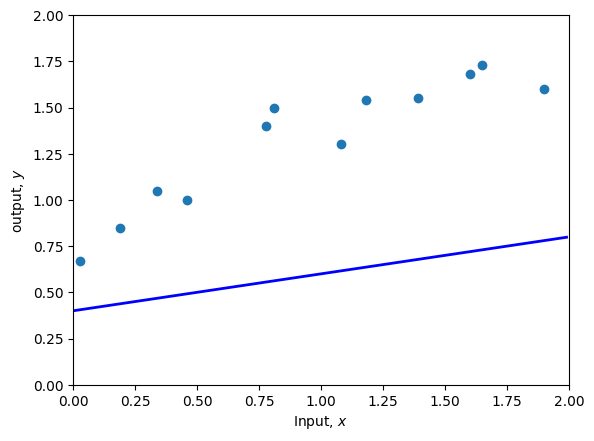

In [74]:
phi0 = 0.4; phi1 = 0.2

plot_f(x,y,phi0,phi1)

In [75]:
# define the function to calculate the loss

def compute_loss(x,y,phi0,phi1):

  y_prediction = f(x,phi0,phi1)
  loss = np.sum((y_prediction - y) ** 2)

  return loss

In [76]:
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth = 7.07')

Your Loss = 7.07, Ground truth = 7.07


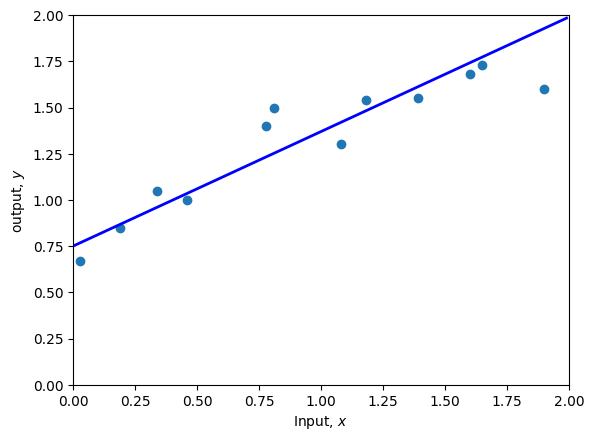

Your Loss = 0.24


In [77]:
# set the intercept and slope as figure 2.2c
phi0 = 0.75; phi1 = 0.62
# plot the data and model

## plot the linear regression model and attempt to fit the model.
plot_f(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')


In [78]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])

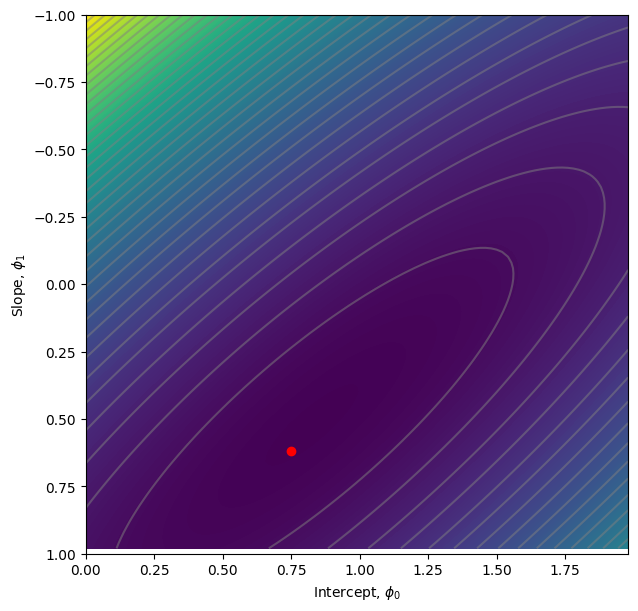

In [79]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, $\phi_0$')
ax.set_ylabel(r'Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()

### Summary
The purpose of this notebook was to get an idea of how supervised learning is implemented using a 1D Linear regression model.  

We began by generating some input and output data which was used for our model. we used np.array to store this data. Each input value from x coresponds to its output value in y.

Our 1D linear regression model is the mathematical equation:

\begin{equation}y=\beta+\omega x,\end{equation}

Which was define for the function f that takes in the parameters, x, phi0, and phi1.

in order to plot our data set and our model, we defined the function plot_f which plots our data set into a scatter plot and our linear regression model. This function takes our data set (x, y) [they are both lists] and the weights as parameters and computes the plot. Up to this section, the purpose was to defne our model, generate our data set and visualize our data set against our model with the specified random weights of the model. Then we proceed to try and best fit the model and minimise our loss.

The next section focuses on calculating the loss function. We defined the function compute_loss that calculates our loss based on the mean squared error formula.

Once the loss is calculated, our goal is to find such weights and parameters for phi0 and phi1 that will best fit the model to the data.